In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 42kB/s 


In [6]:
import tensorflow as tf

In [11]:
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model 
# from keras importing InceptionV3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np

In [12]:
# resize all the images to following size
IMAGE_SIZE = [224,224]

# binding dataset path
train_path = '/content/drive/MyDrive/My Data Science Projects/Tomato Leaf Diseases Deep Learning/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/MyDrive/My Data Science Projects/Tomato Leaf Diseases Deep Learning/New Plant Diseases Dataset(Augmented)/valid'

In [13]:
# importing InceptionV3 library and preprocessing layers to the front of InceptionV3 using ImageNet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [40]:
# don't train existing weights
for layer in inception.layers:
     layer.trainable = False

In [52]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/My Data Science Projects/Tomato Leaf Diseases Deep Learning/New Plant Diseases Dataset(Augmented)/train/*')

In [53]:
x = Flatten()(inception.output)

In [54]:
prediction = Dense(len(folders),activation='softmax')(x)

In [55]:
# create a model object
model = Model(inputs = inception.input, outputs = prediction)

In [56]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [57]:
# tell the model what cost and optimization method to use
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [59]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/My Data Science Projects/Tomato Leaf Diseases Deep Learning/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 14085 images belonging to 10 classes.


In [60]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/My Data Science Projects/Tomato Leaf Diseases Deep Learning/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4586 images belonging to 10 classes.


In [62]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
881/881 [==============================] - 1599s 2s/step - loss: 2.6214 - accuracy: 0.8229 - val_loss: 37.6620 - val_accuracy: 0.6736
Epoch 2/5
881/881 [==============================] - 1537s 2s/step - loss: 2.6291 - accuracy: 0.8461 - val_loss: 37.0586 - val_accuracy: 0.6801
Epoch 3/5
881/881 [==============================] - 1522s 2s/step - loss: 2.4052 - accuracy: 0.8679 - val_loss: 41.1879 - val_accuracy: 0.6653
Epoch 4/5
881/881 [==============================] - 1515s 2s/step - loss: 2.3204 - accuracy: 0.8773 - val_loss: 40.7949 - val_accuracy: 0.6596
Epoch 5/5
881/881 [==============================] - 1520s 2s/step - loss: 2.1129 - accuracy: 0.8934 - val_loss: 38.4324 - val_accuracy: 0.6884


In [63]:
import matplotlib.pyplot as plt

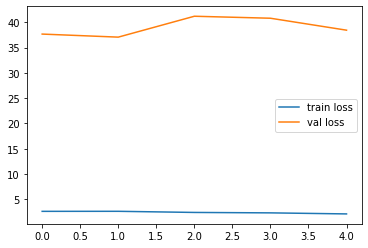

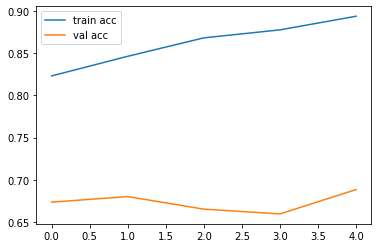

<Figure size 432x288 with 0 Axes>

In [64]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [65]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [66]:
y_pred = model.predict(test_set)

In [67]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.3016930e-35, ..., 3.0360290e-37,
        1.2618986e-36, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.1531842e-34, ..., 6.6045065e-31,
        7.3027177e-31, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 5.3447876e-23, ..., 3.1499658e-34,
        7.6763389e-26, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [72]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [70]:
model=load_model('model_inception.h5')

In [74]:
img=image.load_img('/content/drive/MyDrive/My Data Science Projects/Tomato Leaf Diseases Deep Learning/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG',target_size=(224,224))

In [75]:
x=image.img_to_array(img)
x

array([[[225., 215., 213.],
        [224., 214., 212.],
        [224., 214., 212.],
        ...,
        [178., 164., 163.],
        [173., 159., 158.],
        [168., 154., 153.]],

       [[219., 209., 207.],
        [219., 209., 207.],
        [219., 209., 207.],
        ...,
        [181., 167., 166.],
        [177., 163., 162.],
        [172., 158., 157.]],

       [[223., 213., 211.],
        [223., 213., 211.],
        [223., 213., 211.],
        ...,
        [186., 172., 171.],
        [182., 168., 167.],
        [176., 162., 161.]],

       ...,

       [[145., 126., 119.],
        [140., 121., 114.],
        [144., 125., 118.],
        ...,
        [127., 107., 106.],
        [113.,  93.,  92.],
        [123., 103., 102.]],

       [[163., 144., 137.],
        [150., 131., 124.],
        [155., 136., 129.],
        ...,
        [134., 114., 113.],
        [113.,  93.,  92.],
        [126., 106., 105.]],

       [[151., 132., 125.],
        [135., 116., 109.],
        [144., 1

In [76]:
x.shape

(224, 224, 3)

In [77]:
x=x/255

In [78]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
model.predict(img_data)

array([[1.7660474e-23, 3.1194968e-23, 9.9999940e-01, 3.3750181e-13,
        5.7115938e-07, 3.6027408e-17, 1.8096544e-14, 1.1311820e-24,
        9.5349902e-11, 4.7208187e-15]], dtype=float32)

In [80]:
a=np.argmax(model.predict(img_data), axis=1)

In [81]:
a==1

array([False])